- - -

### `EDA`

Preprocesamiento y análisis exploratorio de datos del indice sp&500. 

In [11]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

Exploración inicial de la información del índice S&P500

In [12]:
sp500_simb = yf.Ticker('^GSPC')

In [13]:
sp500_simb.history(period='1mo')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-01 00:00:00-05:00,4070.070068,4148.950195,4037.199951,4119.209961,4856930000,0.0,0.0
2023-02-02 00:00:00-05:00,4158.680176,4195.439941,4141.879883,4179.759766,5624360000,0.0,0.0
2023-02-03 00:00:00-05:00,4136.689941,4182.359863,4123.359863,4136.479980,4694510000,0.0,0.0
2023-02-06 00:00:00-05:00,4119.569824,4124.629883,4093.379883,4111.080078,4114240000,0.0,0.0
2023-02-07 00:00:00-05:00,4105.350098,4176.540039,4088.389893,4164.000000,4355860000,0.0,0.0
2023-02-08 00:00:00-05:00,4153.470215,4156.850098,4111.669922,4117.859863,4029820000,0.0,0.0
2023-02-09 00:00:00-05:00,4144.250000,4156.229980,4069.669922,4081.500000,4270200000,0.0,0.0
2023-02-10 00:00:00-05:00,4068.919922,4094.360107,4060.790039,4090.459961,3891520000,0.0,0.0
2023-02-13 00:00:00-05:00,4096.620117,4138.899902,4092.669922,4137.290039,3448620000,0.0,0.0


Descarga de la información histórica (del 2000 a la fecha actual) del índice.

In [14]:
#sp500 = yf.download('^GSPC', period='3mo', rounding=True)
sp500 = yf.download('^GSPC', start='2000-01-01', end='2023-01-31', rounding=True, group_by='Date')
sp500

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.25,1478.00,1438.36,1455.22,1455.22,931800000
2000-01-04,1455.22,1455.22,1397.43,1399.42,1399.42,1009000000
2000-01-05,1399.42,1413.27,1377.68,1402.11,1402.11,1085500000
2000-01-06,1402.11,1411.90,1392.10,1403.45,1403.45,1092300000
2000-01-07,1403.45,1441.47,1400.73,1441.47,1441.47,1225200000
...,...,...,...,...,...,...
2023-01-24,4001.74,4023.92,3989.79,4016.95,4016.95,3320430000
2023-01-25,3982.71,4019.55,3949.06,4016.22,4016.22,3724020000
2023-01-26,4036.08,4061.57,4013.29,4060.43,4060.43,3809590000


Visualización de estructura de los datos.

In [15]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5806 entries, 2000-01-03 to 2023-01-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5806 non-null   float64
 1   High       5806 non-null   float64
 2   Low        5806 non-null   float64
 3   Close      5806 non-null   float64
 4   Adj Close  5806 non-null   float64
 5   Volume     5806 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 317.5 KB


Revisión de registros duplicados

In [16]:
sp500[sp500.duplicated()]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [17]:
print('La cantidad de registros duplicados es:', sp500.duplicated().sum())

La cantidad de registros duplicados es: 0


Visualización de valores nulos

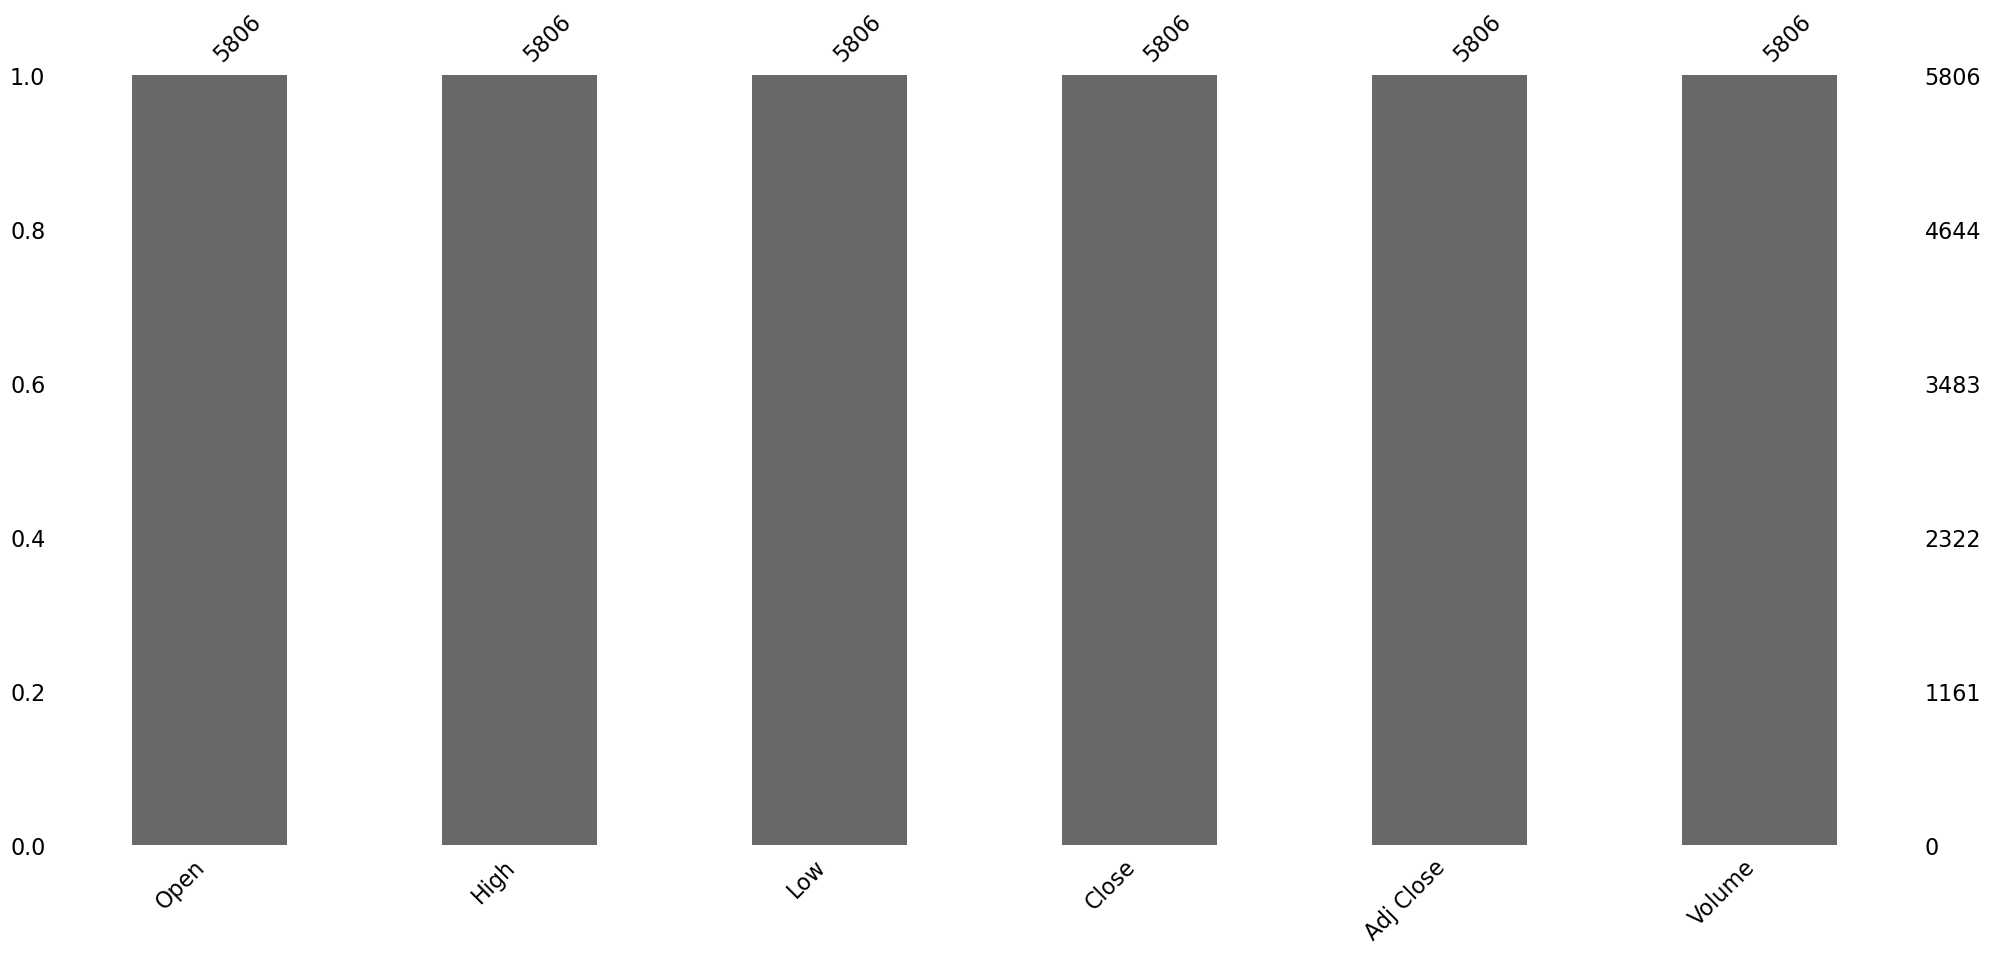

In [18]:
msno.bar(sp500)
plt.show()

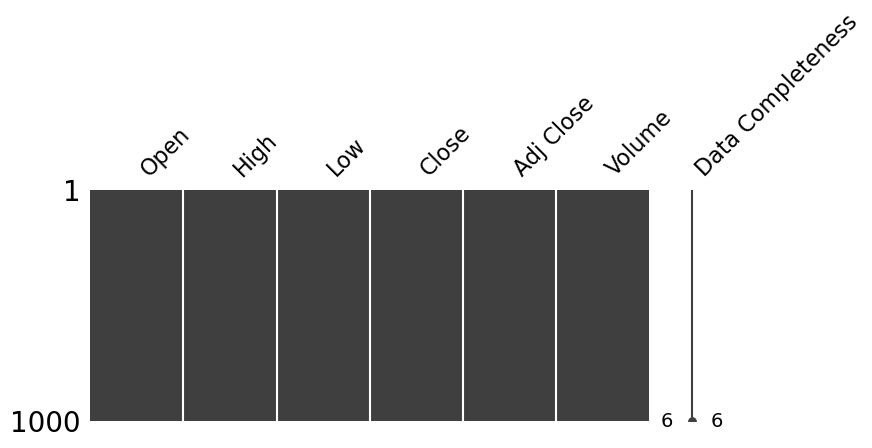

In [19]:
msno.matrix(sp500.sample(1000), labels = True, figsize=(8,3))
plt.show()

Visualización de correlaciones.

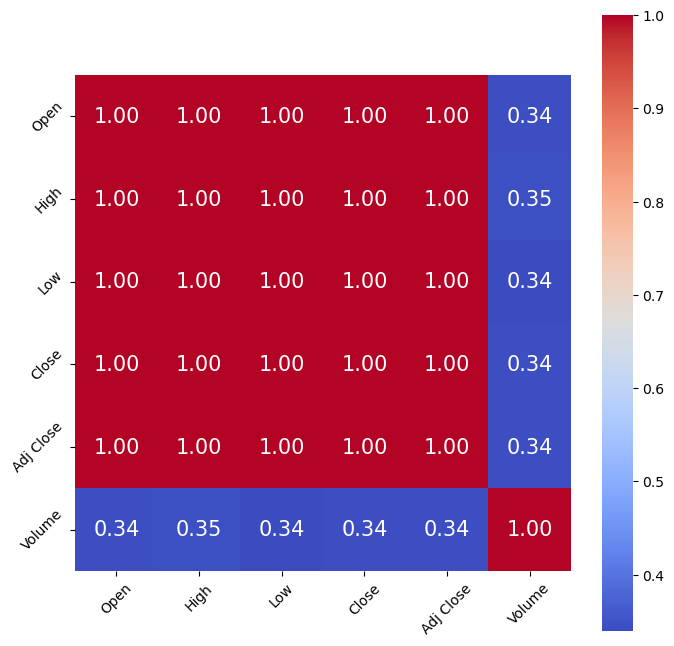

In [20]:
corr = sp500.corr()  #is used for find corelation
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= sp500.columns, 
           yticklabels= sp500.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

Graba la información original del índice S&P500 en un archivo `csv`

In [21]:
sp500.to_csv(r'D:\Henry\Repo\PP\PI02\sp500.csv')

Incorpora los atributos de fechas y ganancia

In [22]:
sp500.reset_index(inplace=True)
sp500.insert(loc=1, column='Datey', value=(sp500['Date'].dt.year))
sp500.insert(loc=2, column='Datem', value=(sp500['Date'].dt.month))
sp500.insert(loc=8, column='Revenue', value=(sp500['Adj Close'] - sp500['Open']))
sp500

,Date,Datey,Datem,Open,High,Low,Close,Adj Close,Revenue,Volume
0,2000-01-03,2000,1,1469.25,1478.00,1438.36,1455.22,1455.22,-14.03,931800000
1,2000-01-04,2000,1,1455.22,1455.22,1397.43,1399.42,1399.42,-55.80,1009000000
2,2000-01-05,2000,1,1399.42,1413.27,1377.68,1402.11,1402.11,2.69,1085500000
3,2000-01-06,2000,1,1402.11,1411.90,1392.10,1403.45,1403.45,1.34,1092300000
4,2000-01-07,2000,1,1403.45,1441.47,1400.73,1441.47,1441.47,38.02,1225200000
...,...,...,...,...,...,...,...,...,...,...
5801,2023-01-24,2023,1,4001.74,4023.92,3989.79,4016.95,4016.95,15.21,3320430000
5802,2023-01-25,2023,1,3982.71,4019.55,3949.06,4016.22,4016.22,33.51,3724020000
5803,2023-01-26,2023,1,4036.08,4061.57,4013.29,4060.43,4060.43,24.35,3809590000
5804,2023-01-27,2023,1,4053.72,4094.21,4048.70,4070.56,4070.56,16.84,3907760000


Visualiza como se distribuye la variable Revenue

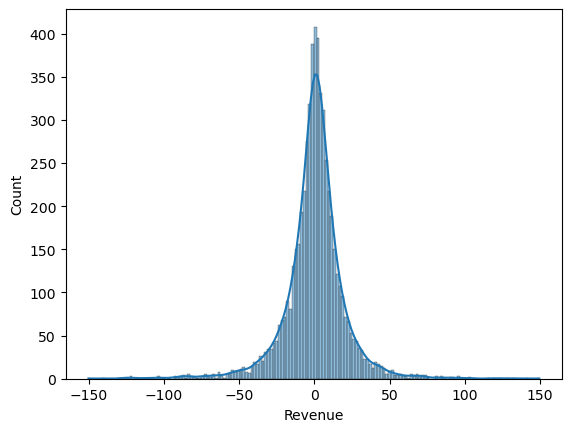

In [23]:
import seaborn as sns
sns.histplot(x = 'Revenue', data= sp500, kde = True)
plt.show()

In [24]:
sp500.describe()

,Datey,Datem,Open,High,Low,Close,Adj Close,Revenue,Volume
count,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5.806000e+03
mean,2011.044265,6.525491,1880.394916,1891.635441,1868.201486,1880.597000,1880.597000,0.202084,3.299971e+09
std,6.656188,3.435783,971.171358,976.228522,965.636068,971.269009,971.269009,20.705814,1.523925e+09
min,2000.000000,1.000000,679.280000,695.270000,666.790000,676.530000,676.530000,-150.220000,3.560700e+08
25%,2005.000000,4.000000,1184.162500,1191.257500,1176.917500,1183.875000,1183.875000,-7.590000,1.980265e+09
50%,2011.000000,7.000000,1432.995000,1441.605000,1424.465000,1432.950000,1432.950000,0.880000,3.406070e+09
75%,2017.000000,10.000000,2379.927500,2388.820000,2367.745000,2380.597500,2380.597500,8.877500,4.158958e+09
max,2023.000000,12.000000,4804.510000,4818.620000,4780.040000,4796.560000,4796.560000,149.540000,1.145623e+10


Agrupa ganacias promedio por mes.

In [25]:
sp500_m = sp500.groupby(['Datey' , 'Datem']).Revenue.sum()
sp500_m = sp500_m.reset_index()
sp500_m

,Datey,Datem,Revenue
0,2000,1,-74.79
1,2000,2,-28.03
2,2000,3,132.15
3,2000,4,-46.16
4,2000,5,-31.82
...,...,...,...
272,2022,9,-216.17
273,2022,10,287.50
274,2022,11,61.10
275,2022,12,-204.22


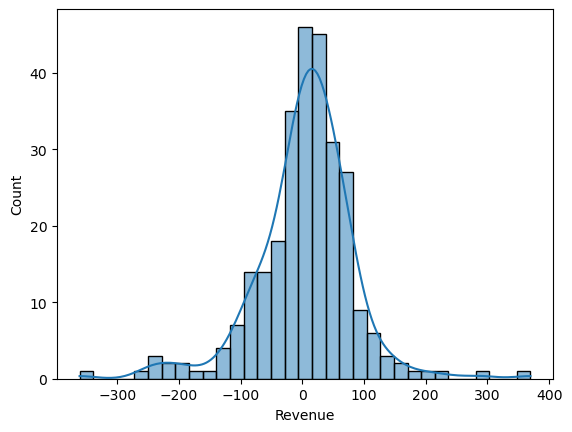

In [26]:
import seaborn as sns
sns.histplot(x = 'Revenue', data= sp500_m, kde = True)
plt.show()

Agrupa ganancias promedio por año.

In [27]:
sp500_y = sp500.groupby('Datey').Revenue.sum()
sp500_y


Datey
2000   -151.22
2001   -174.79
2002   -256.23
2003    231.99
2004     99.27
2005     35.88
2006    175.36
2007     56.72
2008   -502.18
2009    258.13
2010    150.13
2011      5.19
2012    168.38
2013    378.08
2014    156.65
2015    -50.47
2016    141.05
2017    200.92
2018   -425.83
2019    435.65
2020     26.71
2021    558.16
2022   -530.04
2023    185.79
Name: Revenue, dtype: float64

In [28]:
sp500_y = sp500_y.reset_index()
sp500_y

,Datey,Revenue
0,2000,-151.22
1,2001,-174.79
2,2002,-256.23
3,2003,231.99
4,2004,99.27
5,2005,35.88
6,2006,175.36
7,2007,56.72
8,2008,-502.18
9,2009,258.13


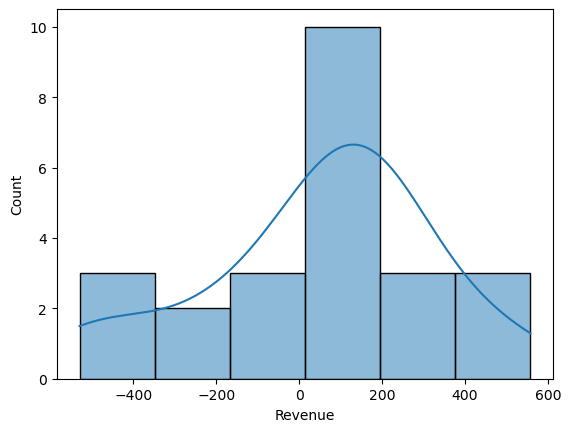

In [29]:
import seaborn as sns
sns.histplot(x = 'Revenue', data= sp500_y, kde = True)
plt.show()

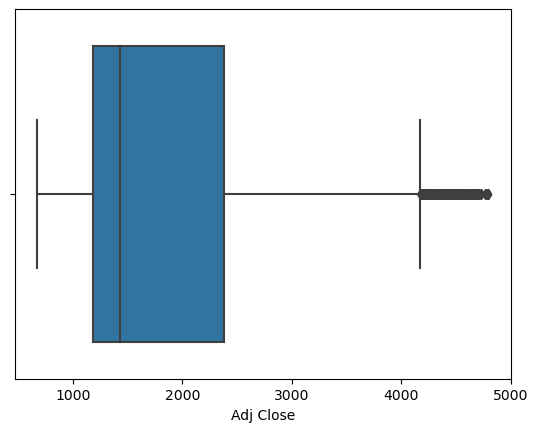

In [30]:
sns.boxplot(x = 'Adj Close', data = sp500)
plt.show()

Graba la información del índice S&P500 en un archivo `csv`

In [31]:
sp500.to_csv(r'D:\Henry\Repo\PP\PI02\sp500p.csv')